<div align="center">

<img src="UoG.png" alt="uog" width="200"/>

# University of Gondar  
## College of Informatics  
## Department of Information Science  
## MSc in Data Science and Analytics  
### SOCIAL NETWORK ANALYTICS
### SENTIMENT ANALYSIS AND TOPIC MODELING

#### Eyob Birhanu & Felegeselam Mesfin
#### JULY, 2025  

</div>

##### This project is our final **Social Network Analytics** project. We have scraped comments from 14 news videos from Youtube. BBC, CNN, AL JAZEERA, SKY NEWS, ASSOCIATE PRESS, NBCNEWS, CGTN, FOX NEWS and 10 NEWS are the sources of information for our sentiment analysis and topic modeling.
##### Our focus is on the Israel vs Iran war, in which we want to analize peoples perspective towards this global incident. We try to see how peoples feel towards the war as positive, negative and neutral. Topic Modeling part will try to get insights on what are the main topics in the peoples comments.
##### We have extracted 41,304 comments from the videos.

### **PART1: EXTRACT COMMENTS**

Our first task is to extract comments using python script which uses Youtube API.

#### Import necessary Libraries

In [10]:
import pandas as pd
import re
import string
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from langdetect import detect

# Downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


#### STEP 1: Load and Drop Missing

In [9]:
df = pd.read_excel("ISRAEL_IRAN.xlsx")
df = df.dropna(subset=['Comment'])
df.to_csv("step1_loaded.csv", index=False)


#### STEP 2: Language Detection (Keep English Only)

In [12]:
df = pd.read_csv("step1_loaded.csv")

def detect_language(text):
    try:
        return detect(text)
    except:
        return "error"

df['lang'] = df['Comment'].apply(detect_language)
df = df[df['lang'] == 'en']
df.to_csv("step2_language_filtered.csv", index=False)


#### STEP 3: Lowercase

In [12]:
df = pd.read_csv("step2_language_filtered.csv")
df['cleaned'] = df['Comment'].str.lower()
df.to_csv("step3_lowercase.csv", index=False)


#### STEP 4: Remove URLs

In [15]:
df = pd.read_csv("step3_lowercase.csv")

def remove_urls(text):
    return re.sub(r"http\S+|www\S+|https\S+", '', text)

df['cleaned'] = df['cleaned'].apply(remove_urls)
df.to_csv("step4_no_urls.csv", index=False)


#### STEP 5: Remove Emojis

In [22]:
!pip install emoji


   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ----------------- ---------------------- 262.1/590.6 kB ? eta -:--:--
   ----------------------------------- ---- 524.3/590.6 kB 1.5 MB/s eta 0:00:01
   ----------------------------------- ---- 524.3/590.6 kB 1.5 MB/s eta 0:00:01
   ----------------------------------- ---- 524.3/590.6 kB 1.5 MB/s eta 0:00:01
   ----------------------------------- ---- 524.3/590.6 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- 590.6/590.6 kB 313.7 kB/s eta 0:00:00


In [24]:
import pandas as pd
import emoji
import re

# Load your data
df = pd.read_csv("step4_no_urls.csv")

# Function to remove emojis and other symbols
def remove_emoji_and_symbols(text):
    if not isinstance(text, str):
        return text

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove miscellaneous symbols and non-alphanumerics except spaces and punctuation
    text = re.sub(r'[^\w\s.,!?;:()\'"-]', '', text)

    return text

# Apply cleaning
df['cleaned'] = df['cleaned'].apply(remove_emoji_and_symbols)

# Save cleaned CSV
df.to_csv("step5_no_emojis.csv", index=False)


#### Step 6: Remove Punctuation

In [30]:
import pandas as pd
import string

df = pd.read_csv("step5_no_emojis.csv")

def remove_punctuation(text):
    if not isinstance(text, str):
        return text
    return text.translate(str.maketrans('', '', string.punctuation))

df['cleaned'] = df['cleaned'].apply(remove_punctuation)
df.to_csv("step6_no_punctuation.csv", index=False)


#### Step 7: Remove Numbers

In [33]:
def remove_numbers(text):
    if not isinstance(text, str):
        return text
    return re.sub(r'\d+', '', text)

df = pd.read_csv("step6_no_punctuation.csv")
df['cleaned'] = df['cleaned'].apply(remove_numbers)
df.to_csv("step7_no_numbers.csv", index=False)


#### Step 8: Remove Stopwords

In [36]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if not isinstance(text, str):
        return text
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

df = pd.read_csv("step7_no_numbers.csv")
df['cleaned'] = df['cleaned'].apply(remove_stopwords)
df.to_csv("step8_no_stopwords.csv", index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eyob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Step 9: Lemmatization

In [39]:
# Download SpaCy English model if you haven’t
# !python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    if not isinstance(text, str):
        return text
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if token.lemma_ != '-PRON-'])

df = pd.read_csv("step8_no_stopwords.csv")
df['cleaned'] = df['cleaned'].apply(lemmatize_text)
df.to_csv("step9_lemmatized.csv", index=False)


### **PART 2: SENTIMENT**

**SENTIMENT GENERATION**

#### Use Pretrained Model

##### 1. VADER (Great for Social Media Text)

In [49]:
!pip install vaderSentiment

Columns loaded: ['Author', 'Time', 'Comment', 'Likes', 'Reply Count', 'lang', 'cleaned']


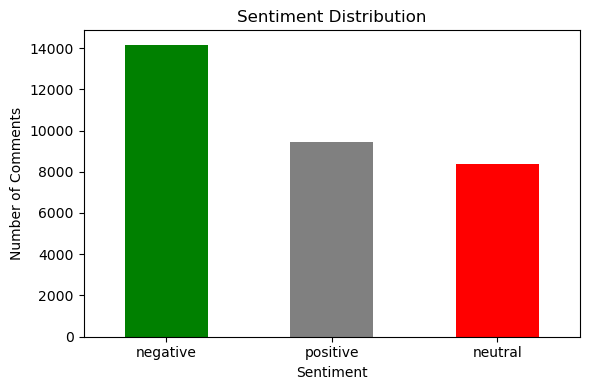

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

# Load data with correct separator
df = pd.read_csv("step9_lemmatized.csv", sep=",", encoding="utf-8")

# Print to verify column structure
print("Columns loaded:", df.columns.tolist())

analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    if not isinstance(text, str):
        return {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'sentiment': 'neutral'}
    
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']
    
    if compound >= 0.05:
        sentiment = 'positive'
    elif compound <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    scores['sentiment'] = sentiment
    return scores

# Apply sentiment analysis
sentiment_df = df['cleaned'].apply(analyze_sentiment).apply(pd.Series)

# Merge with original DataFrame
df = pd.concat([df, sentiment_df], axis=1)

# Save to Excel
df.to_excel("step11_sentiment_vader_NEW.xlsx", index=False)

# Plot sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### **PART 3: Topic Modeling**

Goal:

Find the topics/themes in the comments (e.g., war, politics, religion, peace, etc.).
Using Gensim’s LDA:

In [7]:
import gensim
from gensim import corpora
import pandas as pd

df = pd.read_csv("step10_tokenized.csv")
texts = df['tokens'].apply(eval).tolist()  # Ensure token column is a list

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)

# Print topics
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.043*"war" + 0.037*"israel" + 0.028*"world" + 0.017*"people" + 0.014*"country"
Topic 1: 0.080*"iran" + 0.048*"weapon" + 0.043*"nuclear" + 0.040*"right" + 0.030*"defend"
Topic 2: 0.029*"news" + 0.018*"iron" + 0.017*"sky" + 0.017*"dome" + 0.014*"people"
Topic 3: 0.051*"not" + 0.030*"do" + 0.025*"iran" + 0.024*"israel" + 0.018*"bbc"
Topic 4: 0.051*"israel" + 0.047*"iran" + 0.024*"missile" + 0.012*"iranian" + 0.011*"god"


## Topic 0


Top words: "war", "israel", "world", "people", "country"

Meaning:
This topic seems to be about global concerns regarding war, possibly with a focus on Israel’s involvement in conflicts and how it affects people and countries globally.

## Topic 1

Top words: "iran", "weapon", "nuclear", "right", "defend"

Meaning:
This topic likely concerns Iran's nuclear program, its right to develop weapons, and defense rhetoric—possibly discussing international debates about nuclear capabilities.

## Topic 2

Top words: "news", "iron", "sky", "dome", "people"

Meaning:
This topic is clearly related to the Iron Dome defense system (used by Israel to intercept missiles), discussed in the context of news and public reactions.

## Topic 3 

Top words: "not", "do", "iran", "israel", "bbc"

Meaning:
This one is less specific, but it likely includes public or media discourse (e.g., BBC coverage) on actions or inactions by Iran and Israel, possibly criticisms or policy discussions.

## Topic 4

Top words: "israel", "iran", "missile", "iranian", "god"

Meaning:
This topic reflect discussions about missile attacks or threats between Iran and Israel, potentially with religious or ideological undertones.

### **This is the end for now!!!**